INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14344.429315  12771.404594  15779.182822
1 1968-02-01  14911.718770  13268.134495  16629.667670
2 1968-03-01  20859.142961  19349.942953  22385.466671
3 1968-04-01  22883.352978  21313.401307  24392.386589
4 1968-05-01  24183.139264  22583.816838  25661.552613


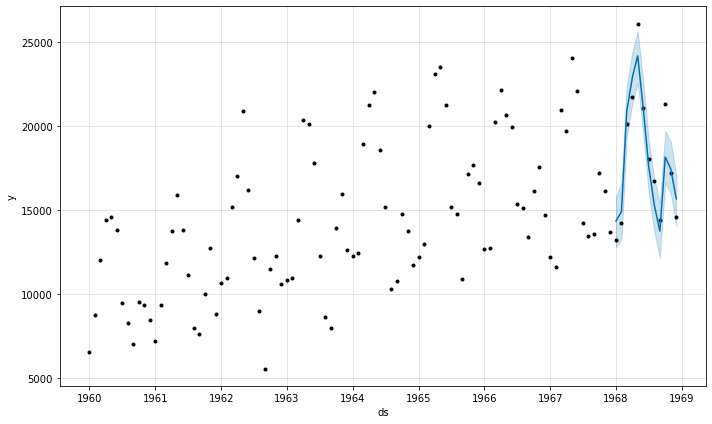

In [7]:
# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [6]:
import Prophet

ModuleNotFoundError: No module named 'Prophet'

In [1]:
import distutils

In [2]:
print(distutils.__file__)

C:\Users\tanma\Anaconda3\lib\distutils\__init__.py


In [5]:
import fbprophet

In [6]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=523492 sha256=2fd2f0c1be1a44b57b3a967f8dfbd071a7a8a2e71372ba2a8f1e74ac7dfedfd9
  Stored in directory: c:\users\tanma\appdata\local\pip\cache\wheels\d0\d2\ae\c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
Note: you may need to restart the kernel to use updated packages.


C:\Users\tanma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tanma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


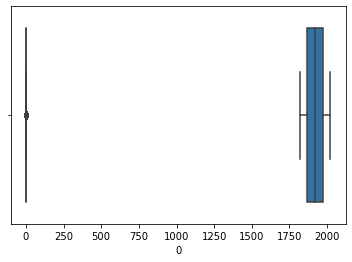

In [8]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import fbprophet 
from fbprophet import Prophet
import pystan


df=pd.read_csv('D:/PROJ_2/SN_d_tot_V2.0.csv', sep=';', header = None)
df[df==-1]=np.nan

df.isnull().sum()

sns.boxplot(df[7])

describe=df.describe()

df[4] = df[4].fillna(df[4].median())
df[5] = df[5].fillna(df[5].median())


#outliers remove

for i in range(0,8):
    

    q1=df.iloc[:,i].quantile(.25)
    q3=df.iloc[:,i].quantile(.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr

    df.iloc[:,i]=np.where(df.iloc[:,i]<low,low,df.iloc[:,i])
    df.iloc[:,i]=np.where(df.iloc[:,i]>high,high,df.iloc[:,i])


sns.boxplot(df[0])

df['year']=df[0]
df['month']=df[1]
df['day']=df[2]
df['sunspot']=df[4]


df['Date']=pd.to_datetime(df[['year', 'month', 'day']])

d=pd.DataFrame()
d[['ds','y']] = df[['Date', 'sunspot']]

'''import pystan
model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
model = pystan.StanModel(model_code=model_code) # this will take a minute
y = model.sampling(n_jobs=1).extract()['y']
y.mean() # should be close to 0'''

model = Prophet(daily_seasonality=True)

model.fit(d)

In [11]:
future_sun=model.make_future_dataframe(periods=365, freq='D')


In [13]:
future_sun.shape

(74569, 1)

In [14]:
forecast_sun=model.predict(future_sun)


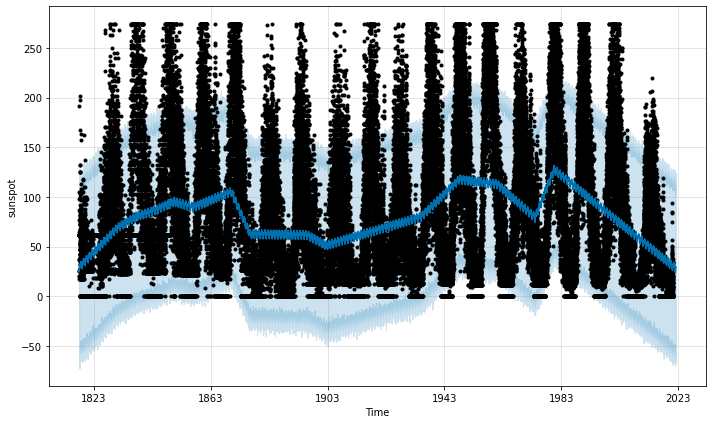

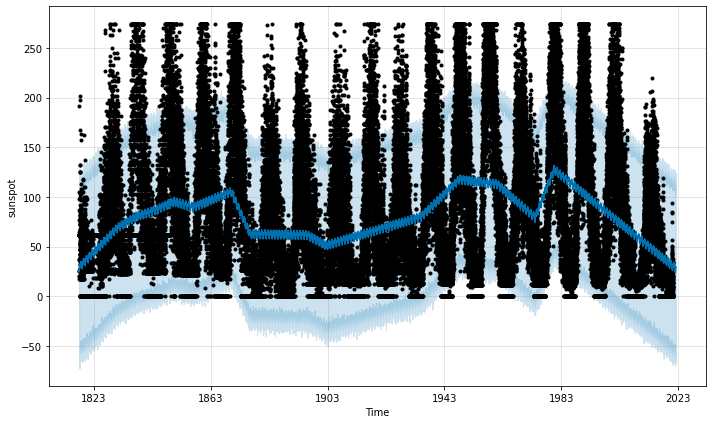

In [15]:
model.plot(forecast_sun,xlabel='Time',
                             ylabel='sunspot')